In [ ]:
!pip install transformers   # install the transformers library

In [6]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
import re
# Preprocess text (username and link placeholders)

def preprocess(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # remove mentions (e.g. @username)
    text = re.sub(r'@\w+', '', text)
    
    # remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # remove non-alphanumeric characters and extra whitespaces
    text = re.sub(r'[^\w\s]', '', text).strip()
    
    return text

MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL,from_tf=True)

def analyze_sentiment(row):
    text = row['text']
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt',truncation=True,max_length=512)
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    for i in range(scores.shape[0]):
        l = config.id2label[ranking[i]]
        s = scores[ranking[i]]
        row[l] = np.round(float(s), 4)
    return row

def sentiment_analysis(text_column):
    df_sentiment = text_column.apply(lambda x: pd.Series({'text': x}))
    df_sentiment = df_sentiment.apply(analyze_sentiment, axis=1)
    df_scores = df_sentiment
    df_scores.columns = ['negative_score', 'neutral_score', 'positive_score','text']
    return df_scores


Loading a TensorFlow model in PyTorch, requires both PyTorch and TensorFlow to be installed. Please see https://pytorch.org/ and https://www.tensorflow.org/install/ for installation instructions.
Loading a TensorFlow model in PyTorch, requires both PyTorch and TensorFlow to be installed. Please see https://pytorch.org/ and https://www.tensorflow.org/install/ for installation instructions.


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Example usage
df = pd.read_csv('data.csv')
df

In [ ]:
df['content']=df['title']+df['content']

In [ ]:
dfv = sentiment_analysis(df['content'])


In [ ]:
# Drop the column "text" from DataFrame dfv and store it in a new DataFrame
dfv=dfv.drop('text', axis=1)


# Append the new DataFrame to df
df = df.join(dfv)


In [ ]:
df

In [ ]:
df.to_csv('sentiment_topic_scores.csv', index=False)


## quarterly

In [ ]:
import pandas as pd
dfq=pd.read_csv('sentiment_topic_scores.csv')
dfq

,Unnamed: 0,article_id,link,content,title,month,year,0,1,2,3,4,5,6,negative_score,neutral_score,positive_score
0,0,1,https://timesofindia.indiatimes.com/city/delhi...,Revamped Central Vista opens to the public | D...,Revamped Central Vista opens to the public | D...,9,2022,0.000000,0.381218,0.000000,0.000000,0.000000,0.037086,0.578924,0.0051,0.2617,0.7332
1,1,2,https://timesofindia.indiatimes.com/city/delhi...,Free Delhi Metro e-bus service to Central Vist...,Free Delhi Metro e-bus service to Central Vist...,9,2022,0.000000,0.931547,0.000000,0.000000,0.000000,0.000000,0.064120,0.0127,0.8847,0.1026
2,2,3,https://timesofindia.indiatimes.com/city/pune/...,Vistadome coaches in all Central Railway train...,Vistadome coaches in all Central Railway train...,10,2022,0.000000,0.000000,0.000000,0.000000,0.000000,0.994556,0.000000,0.0051,0.2805,0.7144
3,3,4,https://timesofindia.indiatimes.com/city/chand...,Railway yard officials pulled up for delay in ...,Railway yard officials pulled up for delay in ...,11,2022,0.000000,0.000000,0.000000,0.000000,0.000000,0.996415,0.000000,0.0562,0.8517,0.0921
4,4,5,https://timesofindia.indiatimes.com/city/delhi...,Delhi: Access to govt offices in Central Vista...,Delhi: Access to govt offices in Central Vista...,8,2022,0.000000,0.000000,0.000000,0.000000,0.585406,0.000000,0.408558,0.0075,0.8857,0.1068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,1145,1146,https://www.business-standard.com/article/curr...,"Central Vista project: Rajpath, India Gate to ...","Central Vista project: Rajpath, India Gate to ...",6,2022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.952292,0.0032,0.7163,0.2805
1146,1146,1147,https://www.business-standard.com/article/curr...,Central Vista Avenue project to be completed i...,Central Vista Avenue project to be completed i...,6,2022,0.000000,0.000000,0.000000,0.000000,0.422705,0.000000,0.570667,0.0075,0.8346,0.1579
1147,1147,1148,https://www.business-standard.com/article/curr...,Fire in shelters for workers near Parliament H...,Fire in shelters for workers near Parliament H...,6,2022,0.013049,0.496220,0.438529,0.013065,0.013049,0.013017,0.013071,0.1176,0.8594,0.0230
1148,1148,1149,https://www.business-standard.com/article/curr...,Central Vista: Ahluwalia Contracts lowest bidd...,Central Vista: Ahluwalia Contracts lowest bidd...,3,2022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.994455,0.0614,0.9036,0.0350


In [ ]:
dfq['month'] = dfq['month'].astype(int)
dfq['year'] = dfq['year'].astype(int)
dfq['joined'] = dfq['month'].astype(str) + '/' + dfq['year'].astype(str)


In [ ]:
dfq['quarter'] = pd.PeriodIndex(pd.to_datetime(dfq['joined'], format='%m/%Y'), freq='Q')
dfq


,Unnamed: 0,article_id,link,content,title,month,year,0,1,2,3,4,5,6,negative_score,neutral_score,positive_score,joined,quarter
0,0,1,https://timesofindia.indiatimes.com/city/delhi...,Revamped Central Vista opens to the public | D...,Revamped Central Vista opens to the public | D...,9,2022,0.000000,0.381218,0.000000,0.000000,0.000000,0.037086,0.578924,0.0051,0.2617,0.7332,9/2022,2022Q3
1,1,2,https://timesofindia.indiatimes.com/city/delhi...,Free Delhi Metro e-bus service to Central Vist...,Free Delhi Metro e-bus service to Central Vist...,9,2022,0.000000,0.931547,0.000000,0.000000,0.000000,0.000000,0.064120,0.0127,0.8847,0.1026,9/2022,2022Q3
2,2,3,https://timesofindia.indiatimes.com/city/pune/...,Vistadome coaches in all Central Railway train...,Vistadome coaches in all Central Railway train...,10,2022,0.000000,0.000000,0.000000,0.000000,0.000000,0.994556,0.000000,0.0051,0.2805,0.7144,10/2022,2022Q4
3,3,4,https://timesofindia.indiatimes.com/city/chand...,Railway yard officials pulled up for delay in ...,Railway yard officials pulled up for delay in ...,11,2022,0.000000,0.000000,0.000000,0.000000,0.000000,0.996415,0.000000,0.0562,0.8517,0.0921,11/2022,2022Q4
4,4,5,https://timesofindia.indiatimes.com/city/delhi...,Delhi: Access to govt offices in Central Vista...,Delhi: Access to govt offices in Central Vista...,8,2022,0.000000,0.000000,0.000000,0.000000,0.585406,0.000000,0.408558,0.0075,0.8857,0.1068,8/2022,2022Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,1145,1146,https://www.business-standard.com/article/curr...,"Central Vista project: Rajpath, India Gate to ...","Central Vista project: Rajpath, India Gate to ...",6,2022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.952292,0.0032,0.7163,0.2805,6/2022,2022Q2
1146,1146,1147,https://www.business-standard.com/article/curr...,Central Vista Avenue project to be completed i...,Central Vista Avenue project to be completed i...,6,2022,0.000000,0.000000,0.000000,0.000000,0.422705,0.000000,0.570667,0.0075,0.8346,0.1579,6/2022,2022Q2
1147,1147,1148,https://www.business-standard.com/article/curr...,Fire in shelters for workers near Parliament H...,Fire in shelters for workers near Parliament H...,6,2022,0.013049,0.496220,0.438529,0.013065,0.013049,0.013017,0.013071,0.1176,0.8594,0.0230,6/2022,2022Q2
1148,1148,1149,https://www.business-standard.com/article/curr...,Central Vista: Ahluwalia Contracts lowest bidd...,Central Vista: Ahluwalia Contracts lowest bidd...,3,2022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.994455,0.0614,0.9036,0.0350,3/2022,2022Q1


In [ ]:
#grouping quarterly


# dfq['negative_score']=dfq['negative_score']+(dfq['negative_score']*dfq['neutral_score']/(dfq['negative_score']+dfq['positive_score']))
# dfq['positive_score']=dfq['positive_score']+(dfq['positive_score']*dfq['neutral_score']/(dfq['negative_score']+dfq['positive_score']))

# average the sentiment score for same month and year
dfq['positive_score']=dfq.groupby(['quarter'])['positive_score'].transform('median')
dfq['negative_score']=dfq.groupby(['quarter'])['negative_score'].transform('median')
dfq['neutral_score']=dfq.groupby(['quarter'])['neutral_score'].transform('median')

# dfq['positive_score']=dfq['positive_score']/(dfq['positive_score']+dfq['negative_score'])
# dfq['negative_score']=dfq['negative_score']/(dfq['positive_score']+dfq['negative_score'])


dfq=dfq.drop_duplicates(subset=['quarter'])
dfq.head()

,Unnamed: 0,article_id,link,content,title,month,year,0,1,2,3,4,5,6,negative_score,neutral_score,positive_score,joined,quarter
0,0,1,https://timesofindia.indiatimes.com/city/delhi...,Revamped Central Vista opens to the public | D...,Revamped Central Vista opens to the public | D...,9,2022,0.000000,0.381218,0.000000,0.0,0.000000,0.037086,0.578924,0.00890,0.77660,0.1639,9/2022,2022Q3
2,2,3,https://timesofindia.indiatimes.com/city/pune/...,Vistadome coaches in all Central Railway train...,Vistadome coaches in all Central Railway train...,10,2022,0.000000,0.000000,0.000000,0.0,0.000000,0.994556,0.000000,0.02085,0.81655,0.0882,10/2022,2022Q4
30,30,31,https://timesofindia.indiatimes.com/city/delhi...,Central Vista: CPWD to hire agency for houseke...,Central Vista: CPWD to hire agency for houseke...,6,2022,0.000000,0.000000,0.078578,0.0,0.000000,0.000000,0.907629,0.01330,0.83460,0.1001,6/2022,2022Q2
46,46,47,https://timesofindia.indiatimes.com/india/why-...,Why not a 'Judicial Vista' on lines of Central...,Why not a 'Judicial Vista' on lines of Central...,3,2022,0.729131,0.000000,0.000000,0.0,0.196555,0.000000,0.071367,0.01560,0.81660,0.0989,3/2022,2022Q1
57,57,58,https://timesofindia.indiatimes.com/city/delhi...,Central Vista: Work on with pollution guards |...,Central Vista: Work on with pollution guards |...,11,2021,0.000000,0.000000,0.241330,0.0,0.000000,0.000000,0.755171,0.06810,0.80400,0.0584,11/2021,2021Q4


In [ ]:
dfq = dfq.sort_values(by="quarter")
dfq = dfq[(dfq["year"] > 2019) | ((dfq["year"] == 2019) & (dfq["month"] >= 8))]

dfq

,Unnamed: 0,article_id,link,content,title,month,year,0,1,2,3,4,5,6,negative_score,neutral_score,positive_score,joined,quarter
249,249,250,https://timesofindia.indiatimes.com/city/delhi...,Best design competition correct way to revamp ...,Best design competition correct way to revamp ...,9,2019,0.000000,0.000000,0.000000,0.000000,0.000000,0.855147,0.140453,0.02490,0.83850,0.08960,9/2019,2019Q3
237,237,238,https://timesofindia.indiatimes.com/city/delhi...,Delhi: Five architecture firms submit bids for...,Delhi: Five architecture firms submit bids for...,10,2019,0.000000,0.000000,0.000000,0.490277,0.000000,0.504774,0.000000,0.01490,0.82740,0.14515,10/2019,2019Q4
206,206,207,https://timesofindia.indiatimes.com/city/delhi...,Central Vista: Partial relief for DDA | Delhi ...,Central Vista: Partial relief for DDA | Delhi ...,2,2020,0.796334,0.000000,0.000000,0.186988,0.000000,0.000000,0.000000,0.02060,0.85145,0.06530,2/2020,2020Q1
200,200,201,https://timesofindia.indiatimes.com/india/supr...,Supreme Court refuses to stay Central Vista re...,Supreme Court refuses to stay Central Vista re...,6,2020,0.931259,0.000000,0.000000,0.061124,0.000000,0.000000,0.000000,0.24000,0.73030,0.02870,6/2020,2020Q2
202,202,203,https://timesofindia.indiatimes.com/india/tata...,Tatas set to bag new Parliament building proje...,Tatas set to bag new Parliament building proje...,9,2020,0.000000,0.000000,0.000000,0.091032,0.581614,0.000000,0.323770,0.02570,0.85630,0.05860,9/2020,2020Q3
126,126,127,https://timesofindia.indiatimes.com/india/expe...,Expert panel recommends granting environment c...,Expert panel recommends granting environment c...,12,2020,0.000000,0.000000,0.000000,0.000000,0.219907,0.000000,0.778165,0.02890,0.79760,0.07505,12/2020,2020Q4
132,132,133,https://timesofindia.indiatimes.com/india/supr...,"Supreme Court clears Central Vista project, ne...","Supreme Court clears Central Vista project, ne...",1,2021,0.436971,0.000000,0.000000,0.559046,0.000000,0.000000,0.000000,0.02100,0.76855,0.11665,1/2021,2021Q1
89,89,90,https://timesofindia.indiatimes.com/india/hc-v...,HC verdict dismissing plea to halt Central Vis...,HC verdict dismissing plea to halt Central Vis...,6,2021,0.995433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.18070,0.73340,0.03580,6/2021,2021Q2
71,71,72,https://timesofindia.indiatimes.com/india/cent...,Central Vista: Four firms submit technical bid...,Central Vista: Four firms submit technical bid...,9,2021,0.068893,0.000000,0.000000,0.000000,0.000000,0.000000,0.919159,0.01960,0.79470,0.09220,9/2021,2021Q3
57,57,58,https://timesofindia.indiatimes.com/city/delhi...,Central Vista: Work on with pollution guards |...,Central Vista: Work on with pollution guards |...,11,2021,0.000000,0.000000,0.241330,0.000000,0.000000,0.000000,0.755171,0.06810,0.80400,0.05840,11/2021,2021Q4


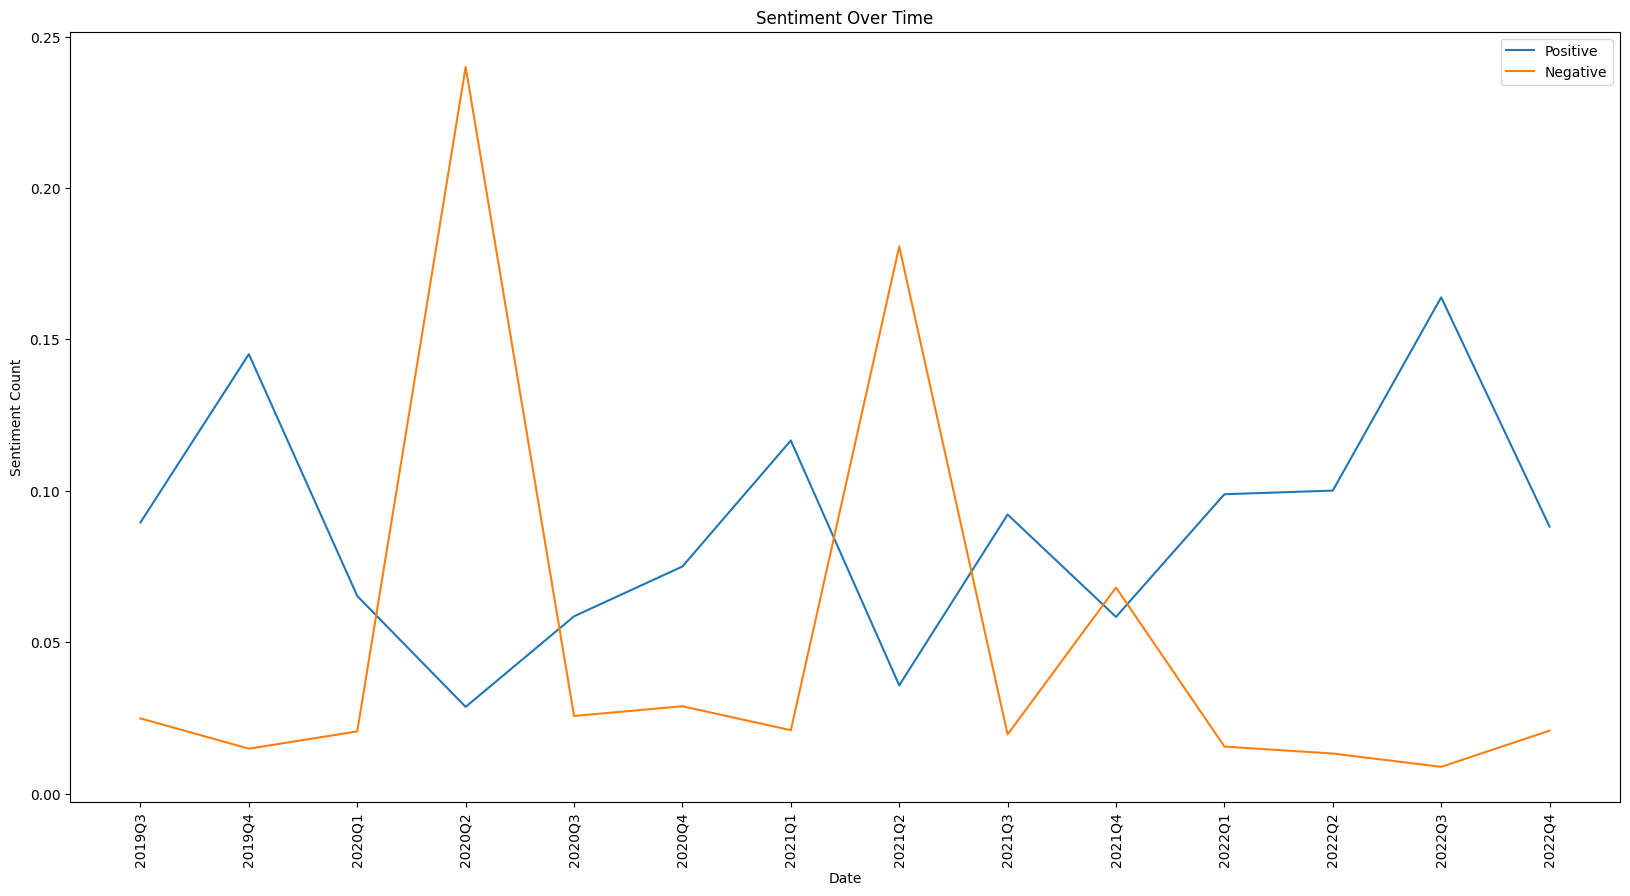

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]
dfq['quarter'] = dfq['quarter'].astype(str)
# create a line plot of the 'positive' column with the x-axis corresponding to the 'date' column
plt.plot(dfq['quarter'], dfq['positive_score'], label='Positive')
plt.xticks(dfq['quarter'], rotation=90)

# create a line plot of the 'negative' column with the x-axis corresponding to the 'date' column
plt.plot(dfq['quarter'], dfq['negative_score'], label='Negative')

# create a line plot of the 'neutral' column with the x-axis corresponding to the 'date' column
# plt.plot(dfq['quarter'], dfq['neutral_score'], label='Neutral')

# add a title and axis labels to the plot
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Count')

# add a legend to the plot
plt.legend()

# show the plot
plt.show()


## pie chart


In [ ]:
df=pd.read_csv('sentiment_topic_scores.csv')

In [ ]:
len(df)
df

,Unnamed: 0,article_id,link,content,title,month,year,0,1,2,3,4,5,6,negative_score,neutral_score,positive_score
0,0,1,https://timesofindia.indiatimes.com/city/delhi...,Revamped Central Vista opens to the public | D...,Revamped Central Vista opens to the public | D...,9,2022,0.000000,0.381218,0.000000,0.000000,0.000000,0.037086,0.578924,0.0051,0.2617,0.7332
1,1,2,https://timesofindia.indiatimes.com/city/delhi...,Free Delhi Metro e-bus service to Central Vist...,Free Delhi Metro e-bus service to Central Vist...,9,2022,0.000000,0.931547,0.000000,0.000000,0.000000,0.000000,0.064120,0.0127,0.8847,0.1026
2,2,3,https://timesofindia.indiatimes.com/city/pune/...,Vistadome coaches in all Central Railway train...,Vistadome coaches in all Central Railway train...,10,2022,0.000000,0.000000,0.000000,0.000000,0.000000,0.994556,0.000000,0.0051,0.2805,0.7144
3,3,4,https://timesofindia.indiatimes.com/city/chand...,Railway yard officials pulled up for delay in ...,Railway yard officials pulled up for delay in ...,11,2022,0.000000,0.000000,0.000000,0.000000,0.000000,0.996415,0.000000,0.0562,0.8517,0.0921
4,4,5,https://timesofindia.indiatimes.com/city/delhi...,Delhi: Access to govt offices in Central Vista...,Delhi: Access to govt offices in Central Vista...,8,2022,0.000000,0.000000,0.000000,0.000000,0.585406,0.000000,0.408558,0.0075,0.8857,0.1068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,1145,1146,https://www.business-standard.com/article/curr...,"Central Vista project: Rajpath, India Gate to ...","Central Vista project: Rajpath, India Gate to ...",6,2022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.952292,0.0032,0.7163,0.2805
1146,1146,1147,https://www.business-standard.com/article/curr...,Central Vista Avenue project to be completed i...,Central Vista Avenue project to be completed i...,6,2022,0.000000,0.000000,0.000000,0.000000,0.422705,0.000000,0.570667,0.0075,0.8346,0.1579
1147,1147,1148,https://www.business-standard.com/article/curr...,Fire in shelters for workers near Parliament H...,Fire in shelters for workers near Parliament H...,6,2022,0.013049,0.496220,0.438529,0.013065,0.013049,0.013017,0.013071,0.1176,0.8594,0.0230
1148,1148,1149,https://www.business-standard.com/article/curr...,Central Vista: Ahluwalia Contracts lowest bidd...,Central Vista: Ahluwalia Contracts lowest bidd...,3,2022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.994455,0.0614,0.9036,0.0350


In [ ]:
positive_count = 0

for i in range(len(df)):
    if df.loc[i, 'positive_score'] > df.loc[i, 'negative_score']:
        positive_count += 1

print("Number of articles with positive score greater than negative score and neutral score:", positive_count)


Number of articles with positive score greater than negative score and neutral score: 668


In [ ]:
negative_count = 0

for i in range(len(df)):
    if df.loc[i, 'negative_score'] > df.loc[i, 'positive_score']:
        negative_count += 1

print("Number of articles with positive score greater than negative score and neutral score:", negative_count)


Number of articles with positive score greater than negative score and neutral score: 481


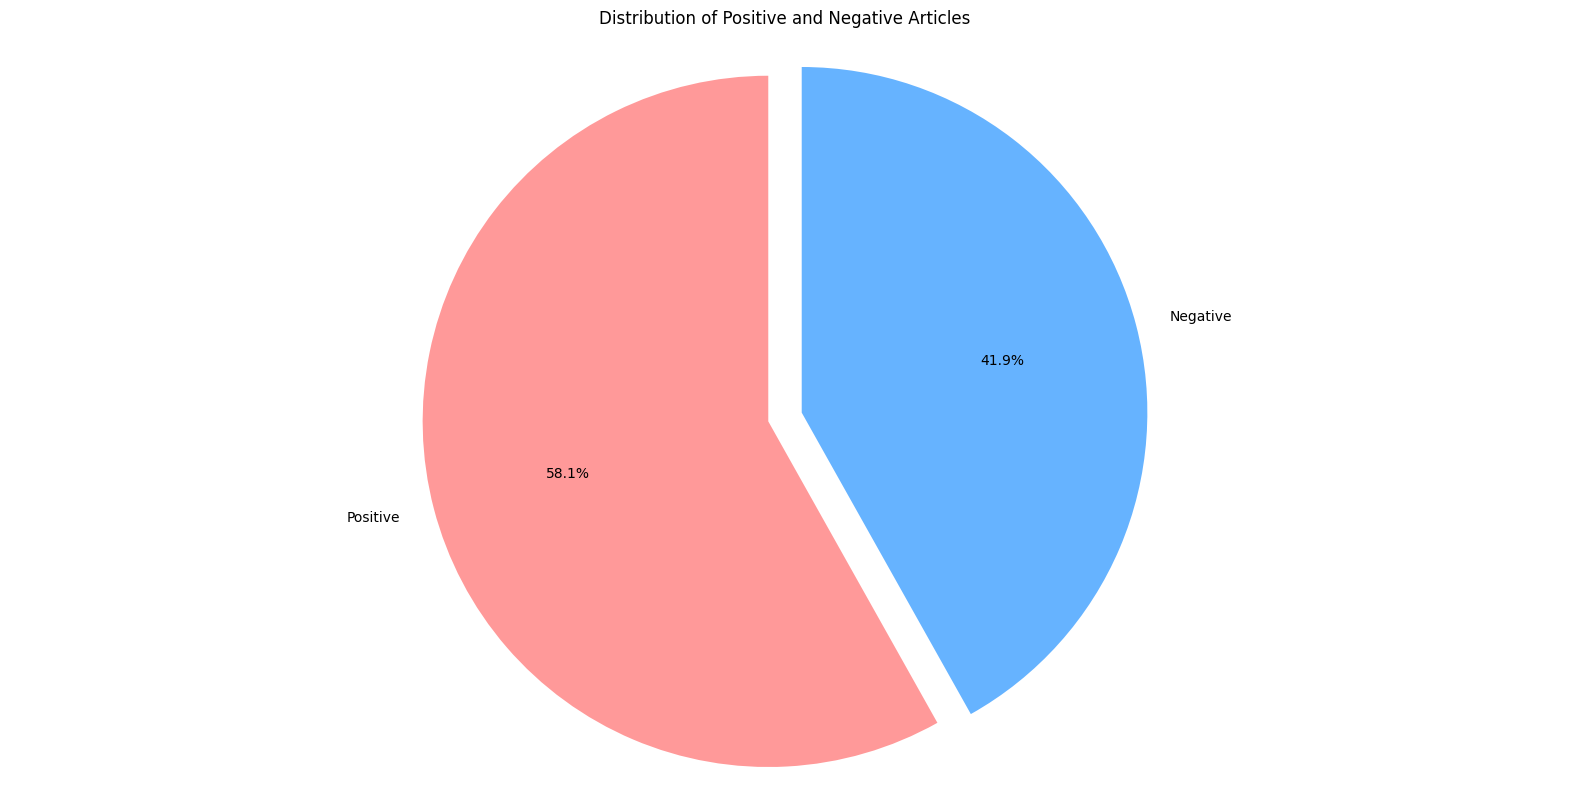

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have two variables 'positive_count' and 'negative_count' representing the counts of positive and negative articles

# Create data for the pie chart
labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]
explode = (0.1, 0)

colors = ['#ff9999', '#66b3ff'] # Colors for positive and negative sections (blue and red)

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,explode=explode)

# Add a title
plt.title('Distribution of Positive and Negative Articles')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures a circular pie
plt.show()
